### Konstantin Garkavyy

# Курсовой проект

**Подключение библиотек и скриптов**

In [1599]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Загрузка данных

In [1600]:
df = pd.read_csv('course_project_train.csv')
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [1601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [1602]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## EDA

**Целевая переменная - Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1603]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

**Выделение целевой переменной и групп признаков**

In [1604]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()


**Корреляция с базовыми признаками**

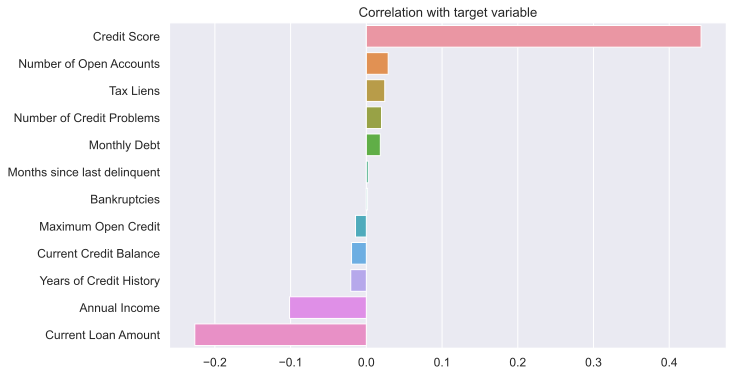

In [1605]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

## Анализ, приведение типов признаков и обработка выбросов.

### Количественные признаки

 **Annual Income**

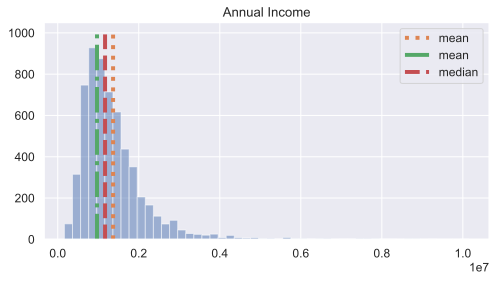

In [1606]:
plt.figure(figsize = (8, 4))

plt.hist(df['Annual Income'], bins=50, alpha=0.5) 

y = np.linspace(0, 1000, 10)
plt.plot([df['Annual Income'].mean()] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([df['Annual Income'].mode()[0]] * 10, y, label='mean', linestyle='-.', linewidth=4)
plt.plot([df['Annual Income'].median()] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Annual Income')
plt.legend()
plt.show()

Заменим пропуски медианой

In [1607]:
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

**Tax Liens**

In [1608]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

**Number of Open Accounts**

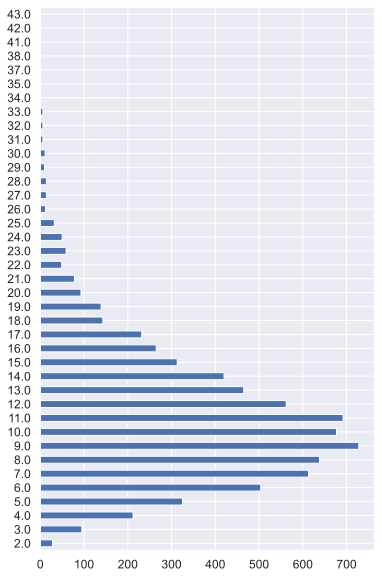

In [1609]:
counts = df['Number of Open Accounts'].value_counts()
plt.figure(figsize = (6, 10))
counts.sort_index().plot(kind='barh')
plt.show()

**Years of Credit History**

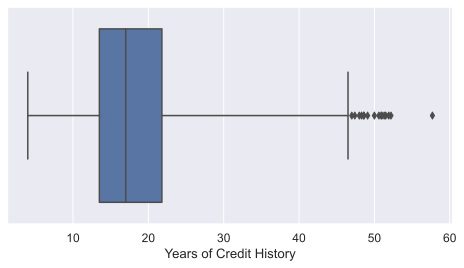

In [1610]:
plt.figure(figsize = (8, 4))
sns.boxplot(x=df['Years of Credit History'], whis=3)
plt.xlabel('Years of Credit History')
plt.show()

Исправим выбросы заменив медианой.

In [1611]:
df.loc[(df['Years of Credit History'] > df['Years of Credit History'].quantile(.975)), 'Years of Credit History'] \
= df['Years of Credit History'].median()

**Maximum Open Credit**

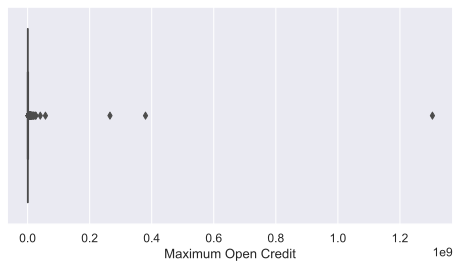

In [1612]:
plt.figure(figsize = (8, 4))
sns.boxplot(x=df['Maximum Open Credit'], whis=3)
plt.xlabel('Maximum Open Credit')
plt.show()

In [1613]:
df.loc[(df['Maximum Open Credit'] > df['Maximum Open Credit'].quantile(.975)), 'Maximum Open Credit'].shape

(188,)

Как мы видим, выбросы критически велики, но их не очень много. Заменим медианой.

In [1614]:
df.loc[(df['Maximum Open Credit'] > df['Maximum Open Credit'].quantile(.975)), 'Maximum Open Credit'] \
= df['Maximum Open Credit'].median()

**Number of Credit Problems**

In [1615]:
df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

**Bankruptcies** содержит пропуски. Логичнее асего заменить их на 0.

In [1616]:
df['Bankruptcies'].isna().sum()

14

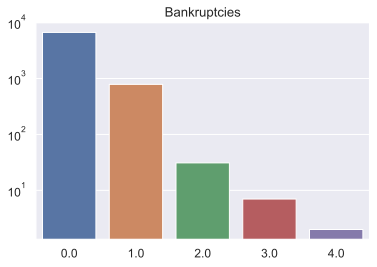

In [1617]:
df['Bankruptcies'].fillna(0, inplace=True)

plt.figure(figsize = (6, 4))
plt.title('Bankruptcies')
sns.barplot(x=df['Bankruptcies'].value_counts().index, y=df['Bankruptcies'].value_counts().values).set_yscale("log")
plt.show()

**Current Loan Amount** - текущая сумма кредита

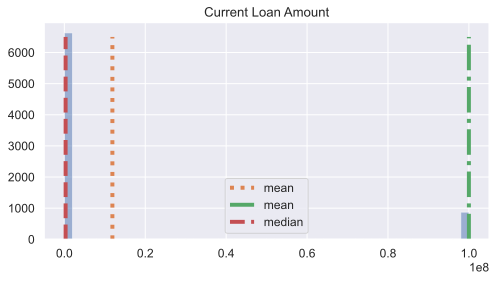

In [1618]:
plt.figure(figsize = (8, 4))

plt.hist(df['Current Loan Amount'], bins=50, alpha=0.5) 

y = np.linspace(0, 6500, 10)
plt.plot([df['Current Loan Amount'].mean()] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([df['Current Loan Amount'].mode()[0]] * 10, y, label='mean', linestyle='-.', linewidth=4)
plt.plot([df['Current Loan Amount'].median()] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Current Loan Amount')
plt.legend()
plt.show()

In [1619]:
df['Current Loan Amount'].value_counts().sort_index()

11242.0         1
21472.0         2
21516.0         1
21560.0         1
21582.0         1
             ... 
788634.0        2
788788.0        1
788942.0        1
789030.0        1
99999999.0    870
Name: Current Loan Amount, Length: 5386, dtype: int64

В датасете присутствуют строки с аномально большим параметром Current Loan Amount, прячём строго равным 99999999. Вряд ли такой крупный кредит мог быть выдан, скорее всего есть ошибка. Поэтому заменим эти выбросы медианным значением.

In [1620]:
df.loc[(df['Current Loan Amount'] == 99999999), 'Current Loan Amount'] \
= df['Current Loan Amount'].median()

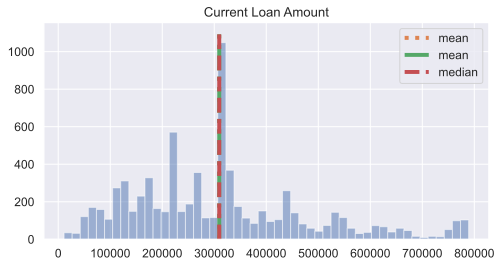

In [1621]:
plt.figure(figsize = (8, 4))

plt.hist(df['Current Loan Amount'], bins=50, alpha=0.5) 

y = np.linspace(0, 1100, 10)
plt.plot([df['Current Loan Amount'].mean()] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([df['Current Loan Amount'].mode()[0]] * 10, y, label='mean', linestyle='-.', linewidth=4)
plt.plot([df['Current Loan Amount'].median()] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Current Loan Amount')
plt.legend()
plt.show()

**Current Credit Balance**

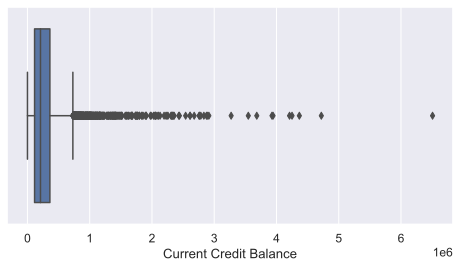

In [1622]:
plt.figure(figsize = (8, 4))
sns.boxplot(x=df['Current Credit Balance'], whis=1.5)
plt.xlabel('Current Credit Balance')
plt.show()

Обрботаем выбросы.

In [1623]:
df.loc[(df['Current Credit Balance'] > df['Current Credit Balance'].quantile(.975)), \
       'Current Credit Balance'] = df['Current Credit Balance'].median()

**Monthly Debt**

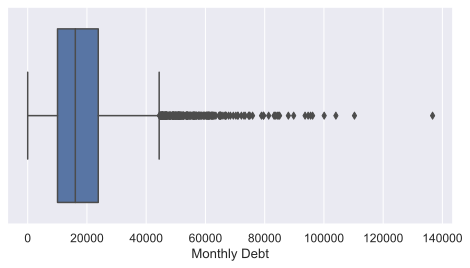

In [1624]:
plt.figure(figsize = (8, 4))
sns.boxplot(x=df['Monthly Debt'], whis=1.5)
plt.xlabel('Monthly Debt')
plt.show()

Обрботаем выбросы.

In [1625]:
df.loc[(df['Monthly Debt'] > df['Monthly Debt'].quantile(.975)), 'Monthly Debt'] = df['Monthly Debt'].median()

**Credit Score**

<AxesSubplot:>

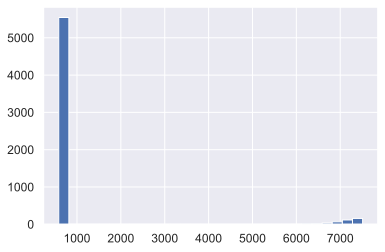

In [1626]:
df['Credit Score'].hist(bins=30)

<AxesSubplot:>

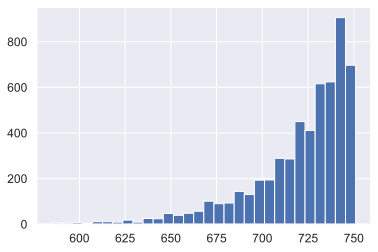

In [1627]:
df.loc[(df['Credit Score'] <= 1000), 'Credit Score'].hist(bins=30)

<AxesSubplot:>

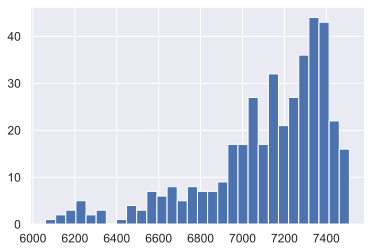

In [1628]:
df.loc[(df['Credit Score'] > 1000), 'Credit Score'].hist(bins=30)

Знечения кредитного рейтинга выше 1000 предположительно были ошибочно введены помноженными на 10. Протестируем гипотезу о равенстве мат.ожиданий в выборках со значением кредитного рейтинга меньше 1000 и со значением кредитного рейтинга больше 1000, пделенным на 10.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух выборках равны
* Альтернативная гипотеза: средние значения в двух выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

In [1629]:
credit_score = df[['Credit Score']].sample(3000).dropna()

In [1630]:
credit_score['Anomaly Credit Score'] = '!>1000'
credit_score.loc[credit_score['Credit Score'] > 1000, 'Anomaly Credit Score'] = '>1000'
credit_score['Anomaly Credit Score'].value_counts()

!>1000    2213
>1000      161
Name: Anomaly Credit Score, dtype: int64

In [1631]:
credit_score_a = credit_score['Credit Score']

In [1632]:
credit_score.loc[credit_score['Anomaly Credit Score'] == '>1000', 'Credit Score'] = credit_score['Credit Score'] / 10

In [1633]:
credit_score_larger_1000_div_10 = credit_score.loc[credit_score['Anomaly Credit Score'] == '>1000', 'Credit Score']
credit_score_less_1000 = credit_score.loc[credit_score['Anomaly Credit Score'] == '!>1000', 'Credit Score']

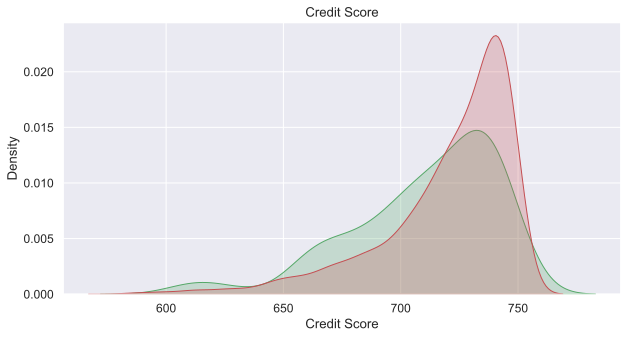

In [1634]:
plt.figure(figsize=(10, 5))

sns.kdeplot(credit_score_larger_1000_div_10, shade=True, label='No default', color='g')
sns.kdeplot(credit_score_less_1000, shade=True, label='Default', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score')
plt.show()

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [1635]:
shapiro(credit_score_a)

ShapiroResult(statistic=0.8478696942329407, pvalue=5.338947149077553e-43)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается. В связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

In [1636]:
mannwhitneyu(credit_score_larger_1000_div_10, credit_score_less_1000)

MannwhitneyuResult(statistic=137875.0, pvalue=1.6149017109199827e-06)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

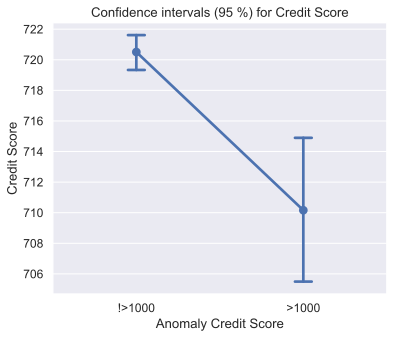

In [1637]:
plt.figure(figsize=(6, 5))

sns.pointplot(x='Anomaly Credit Score', y='Credit Score', data=credit_score, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и наше предположение о том, что значения кредитного рейтинга большк 1000 ошибочно помножены на 10, скорее всего не верно.

### Категориальные признаки

**Home Ownership** - домовладение

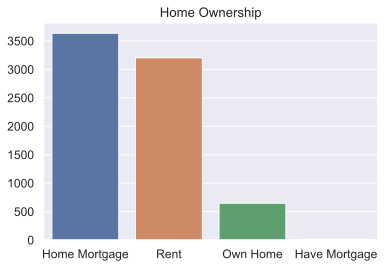

In [1638]:
plt.figure(figsize = (6, 4))
plt.title('Home Ownership')
sns.barplot(x=df['Home Ownership'].value_counts().index, y=df['Home Ownership'].value_counts().values)
plt.show()

**Years in current job**

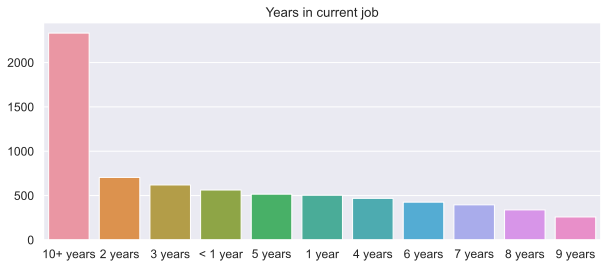

In [1639]:
plt.figure(figsize = (10, 4))
plt.title('Years in current job')
sns.barplot(x=df['Years in current job'].value_counts().index, y=df['Years in current job'].value_counts().values)
plt.show()

Заменим пропуски модой

In [1640]:
df['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)

**Purpose** - цель кредита

In [1641]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

**Term** - срок кредита

In [1642]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

### Генерация новых признакоа

На основе данных о чрезмерно высоком годовом доходе создадим новый признак **Annual Income Anomaly**

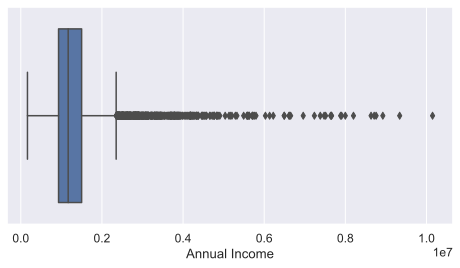

In [1643]:
plt.figure(figsize = (8, 4))
sns.boxplot(x=df['Annual Income'], whis=1.5, orient='h')

plt.xlabel('Annual Income')
plt.show()

In [1644]:
df['Annual Income Anomaly'] = 0
df.loc[(df['Annual Income'] > df['Annual Income'].quantile(.975)), 'Annual Income Anomaly'] = 1

**Months since last delinquent** - количество месяцев с последней просрочки платежа содержит множество пропусков. Можно предположить, что в строках, где этот признак пропущен, просрочки платежей не было. На основе этих данных создадим новый признак **has_delay**. А сами пропуски заменим на 0.

In [1645]:
df['Months since last delinquent'].isna().sum()

4081

In [1646]:
df['has_delay'] = 1
df.loc[df['Months since last delinquent'].isna(), 'has_delay'] = 0
df['has_delay'].value_counts()

0    4081
1    3419
Name: has_delay, dtype: int64

In [1647]:
df['Months since last delinquent'].fillna(0, inplace=True)

Создадим новый признак на основе пропусков в **Credit Score**. А сами пропуски заменим нулями, предпологая отсутствие кредитного рейтинга.

In [1648]:
df['Non Credit Score'] = 0
df.loc[df['Credit Score'].isna(), 'Non Credit Score'] = 1
df['Non Credit Score'].value_counts()

0    5943
1    1557
Name: Non Credit Score, dtype: int64

In [1649]:
df['Credit Score'].fillna(0, inplace=True)

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

**Матрица корреляций**

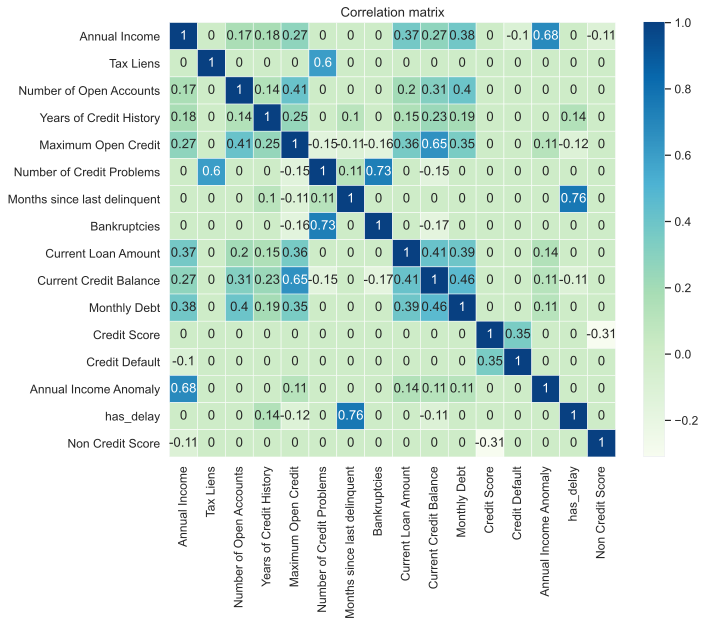

In [1650]:
plt.figure(figsize = (10,8))

sns.set(font_scale=1.1)

corr_matrix = df.corr().round(2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Из матрици корреляций видно, что каких-то очень явных линейных зависимостей между парами признаков в нашем датасете не наблюдается. То есть проблемы мультиколлинеарности у нас нет, и убирать какие-либо признаки мы не будем. 

### Приведение типов

In [1651]:
for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
    df[colname] = df[colname].astype('category')

Заменим категориальные признаки **дамми-переменными**

In [1652]:
df = pd.get_dummies(df)

In [1653]:
df.sample(5)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
7495,402192.0,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,129360.0,73492.0,...,0,0,1,0,0,0,0,0,0,1
3213,878712.0,0.0,4.0,13.4,348480.0,0.0,34.0,0.0,309672.0,179075.0,...,0,0,0,0,0,0,0,0,0,1
6660,1168386.0,0.0,9.0,9.3,317900.0,0.0,0.0,0.0,528594.0,216353.0,...,0,0,1,0,0,0,0,0,1,0
4405,1168386.0,0.0,3.0,22.5,0.0,0.0,35.0,0.0,86724.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3562,2799270.0,0.0,17.0,26.2,524788.0,0.0,13.0,0.0,388960.0,292790.0,...,0,0,0,0,0,0,0,0,1,0


In [1654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   7500 non-null   float64
 1   Tax Liens                       7500 non-null   float64
 2   Number of Open Accounts         7500 non-null   float64
 3   Years of Credit History         7500 non-null   float64
 4   Maximum Open Credit             7500 non-null   float64
 5   Number of Credit Problems       7500 non-null   float64
 6   Months since last delinquent    7500 non-null   float64
 7   Bankruptcies                    7500 non-null   float64
 8   Current Loan Amount             7500 non-null   float64
 9   Current Credit Balance          7500 non-null   float64
 10  Monthly Debt                    7500 non-null   float64
 11  Credit Score                    7500 non-null   float64
 12  Credit Default                  75

### Соберём всё в единый пайплайн

In [1655]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        self.medians = None
        self.modes = None

    def fit(self, df, y=None):
        """Сохранение статистик"""
        self.medians = df[['Annual Income', 'Years of Credit History', 'Maximum Open Credit', 'Credit Score', \
                           'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt']].median()
        self.modes = df[['Years in current job']].mode()        
     
    def transform(self, df):
        """Трансформация данных"""

        # Ошибки и выбросы
        df.loc[(df['Years of Credit History'] > df['Years of Credit History'].quantile(.975)), \
               'Years of Credit History'] = self.medians['Years of Credit History']
        df.loc[(df['Maximum Open Credit'] > df['Maximum Open Credit'].quantile(.975)), \
               'Maximum Open Credit'] = self.medians['Maximum Open Credit']
        df.loc[(df['Current Loan Amount'] == 99999999), \
               'Current Loan Amount'] = self.medians['Current Loan Amount']
        df.loc[(df['Current Credit Balance'] > df['Current Credit Balance'].quantile(.975)), \
               'Current Credit Balance'] = self.medians['Current Credit Balance']
        df.loc[(df['Monthly Debt'] > df['Monthly Debt'].quantile(.975)), \
               'Monthly Debt'] = self.medians['Monthly Debt']
    
        # Новые фичи (features)
        df['Annual Income Anomaly'] = 0
        df.loc[(df['Annual Income'] > df['Annual Income'].quantile(.975)), 'Annual Income Anomaly'] = 1
        df['has_delay'] = 1
        df.loc[df['Months since last delinquent'].isna(), 'has_delay'] = 0
        df['Non Credit Score'] = 0
        df.loc[df['Credit Score'].isna(), 'Non Credit Score'] = 1
      
        # Пропуски
        df['Annual Income'].fillna(self.medians['Annual Income'], inplace=True)
        df['Bankruptcies'].fillna(0, inplace=True)
        df['Credit Score'].fillna(0, inplace=True)
        df['Years in current job'].fillna(self.modes['Years in current job'][0], inplace=True)
        df['Months since last delinquent'].fillna(0, inplace=True)
                
        # Изменение типов
        for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
            df[colname] = df[colname].astype('category')
        df = pd.get_dummies(df)
        
        # Переименование признака для XGBoost
        df.rename(columns = {'Years in current job_< 1 year' : 'Years in current job_not 1 year'}, inplace=True)

        
        return df

## Подготовка датасетов

**Читаем данные из файла**

In [1656]:
train_df = pd.read_csv('course_project_train.csv')
test_df = pd.read_csv('course_project_test.csv')

**Отделим от нашего датасета целевую переменную**


In [1657]:
y = train_df[TARGET_NAME]
data = train_df.drop(TARGET_NAME, axis=1)

**Разделим данные на тренировочные и валидационные**

In [1658]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.3, random_state=21)

X_train.reset_index(drop=True, inplace=True), X_valid.reset_index(drop=True, inplace=True)

(None, None)

In [1659]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5250, 16), (2250, 16), (5250,), (2250,))

**Применим наш пайплайн**

In [1660]:
dp = DataPipeline()

dp.fit(X_train)
data = dp.transform(data)
X_train = dp.transform(X_train)
X_valid = dp.transform(X_valid)
test_df = dp.transform(test_df)

In [1661]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5250, 47), (2250, 47), (5250,), (2250,))

**Стандартизация признаков**

In [1662]:
scaler = StandardScaler()

feature_names_for_stand = X_train[X_train.columns.tolist()].select_dtypes(include=['float64']).columns.tolist()
feature_names_for_stand

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [1663]:
X_train[feature_names_for_stand] = pd.DataFrame(scaler.fit_transform(X_train[feature_names_for_stand]), \
                                               columns=feature_names_for_stand)
def scal(df):
    df[feature_names_for_stand] = pd.DataFrame(scaler.transform(df[feature_names_for_stand]), \
                                               columns=feature_names_for_stand)
    return df

data = scal(data)
X_valid = scal(X_valid)
test_df = scal(test_df)

**Балансировка целевой переменной**

In [1664]:
target = pd.DataFrame({
    "Id": X_train.index,
    TARGET_NAME: y_train}).set_index('Id')

X_train[TARGET_NAME] = target[TARGET_NAME].astype('uint8')

In [1665]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name])

    disbalance = target_counts[major_class_name] - target_counts[minor_class_name]
    sample = df[df[target_name] == minor_class_name].sample(int(disbalance * 0.8), replace=True)
    df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [1666]:
df_balanced = balance_df_by_target(X_train, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    3312
Name: Credit Default, dtype: int64

In [1667]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

## Построение моделей и подбор параметров

In [1668]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('VALID\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [1669]:
# model_lr = LogisticRegression()
# model_lr.fit(X_train, y_train)

# y_train_pred = model_lr.predict(X_train)
# y_valid_pred = model_lr.predict(X_valid)

# get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

**Логистическая регрессия** на валидационном датасете для целевой переменной показала \
**precision = 0.52** \
**recall = 0.51** \
**f1-score = 0.51** 

In [1670]:
# model_knn = KNeighborsClassifier()
# model_knn.fit(X_train, y_train)

# y_train_pred = model_knn.predict(X_train)
# y_valid_pred = model_knn.predict(X_valid)

# get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

**k ближайших соседей** на валидационном датасете для целевой переменной показала \
**precision = 0.41** \
**recall = 0.54** \
**f1-score = 0.47** 

In [1671]:
# model_xgb = xgb.XGBClassifier(random_state=21)
# model_xgb.fit(X_train, y_train)

# y_train_pred = model_xgb.predict(X_train)
# y_valid_pred = model_xgb.predict(X_valid)

# get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

**XGBoost** на валидационном датасете для целевой переменной показала \
**precision = 0.51** \
**recall = 0.43** \
**f1-score = 0.47** 

In [1672]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_valid_pred = model_catb.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3771
           1       0.94      0.89      0.92      3312

    accuracy                           0.92      7083
   macro avg       0.93      0.92      0.92      7083
weighted avg       0.92      0.92      0.92      7083

VALID

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1616
           1       0.55      0.48      0.52       634

    accuracy                           0.74      2250
   macro avg       0.68      0.66      0.67      2250
weighted avg       0.74      0.74      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1369  247
1                328  306


**CatBoost** на валидационном датасете для целевой переменной показала \
**precision = 0.55** \
**recall = 0.48** \
**f1-score = 0.52** 
Будем использовать её.

### Выбор лучшей модели и подбор гиперпараметров

Модель с параметрами по умолчанию получилась сильно переобученной. Попытаемся это исправить, подобрав гиперпараметры.

In [1691]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

**Подбор гиперпараметров для выбранной модели с применением регуляризации**

In [1692]:
params = {'n_estimators':[50, 100, 200, 500, 700],
          'max_depth':[3, 5, 7, 9],
         'l2_leaf_reg':np.arange(5, 20, 2)}

cv=KFold(n_splits=5, random_state=21, shuffle=True)

In [1693]:
# %%time

# gs = GridSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
# gs.fit(data, y)

In [1694]:
# gs.best_params_

In [1695]:
# gs.best_score_

Применив GridSearchCV видим, что наибольшее значение f1-score (0.543487) достигается с параметрами \
{'l2_leaf_reg': 15, 'max_depth': 5, 'n_estimators': 200}

**Важность признаков**

Оценим оптимальное количество фичей, на котором модель с подобранными гиперпараметрами покажет наибольшее значение f1-score.

In [1696]:
model = catb.CatBoostClassifier(n_estimators=200, max_depth=5, l2_leaf_reg=15,
                                      silent=True, random_state=21)
model.fit(X_train, y_train)

In [1697]:
def feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    return feature_importances['feature'][:get_top].tolist()

In [1698]:
num_features = np.arange(5, len(X_train.columns)+1)

In [1699]:
precisions = []
recalls = []
f_scores = []
model_2 = catb.CatBoostClassifier(n_estimators=200, max_depth=5, l2_leaf_reg=15,
                                      silent=True, random_state=21)
for i in num_features:
    important_features_top = feature_importances(X_train.columns, model.feature_importances_, get_top=i)
    
    model_2.fit(X_train[important_features_top], y_train)
    y_valid_pred = model_2.predict(X_valid[important_features_top])
    
    precisions.append(precision_score(y_valid, y_valid_pred))
    recalls.append(recall_score(y_valid, y_valid_pred))
    f_scores.append(f1_score(y_valid, y_valid_pred))

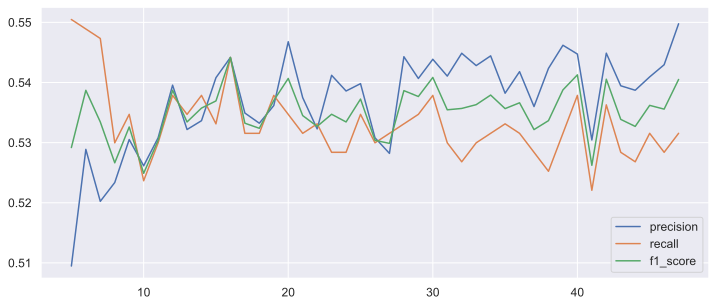

In [1682]:
figure = plt.figure(figsize = (12, 5))
plt.plot(num_features, precisions, label = 'precision')
plt.plot(num_features, recalls, label = 'recall')
plt.plot(num_features, f_scores, label = 'f1_score')
plt.legend()
plt.show()

Таким образом, видно, что максимальное значение всех метрик, включая f1-score, для целевой переменной достигается при количестве признаков равном 16.
Будем испльзовать это значение при обучении финальной модели.

**Обучение и оценка финальной модели**

In [1700]:
important_features_top = feature_importances(X_train.columns, model.feature_importances_, get_top=16)

In [1701]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=200, max_depth=5, l2_leaf_reg=15,
                                      silent=True, random_state=21)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_valid_pred = final_model.predict(X_valid[important_features_top])

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3771
           1       0.78      0.63      0.70      3312

    accuracy                           0.74      7083
   macro avg       0.75      0.74      0.74      7083
weighted avg       0.75      0.74      0.74      7083

VALID

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1616
           1       0.54      0.54      0.54       634

    accuracy                           0.74      2250
   macro avg       0.68      0.68      0.68      2250
weighted avg       0.74      0.74      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1327  289
1                289  345
CPU times: user 1.88 s, sys: 161 ms, total: 2.04 s
Wall time: 443 ms


## Прогнозирование на тестовом датасете

In [1702]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Annual Income                    2500 non-null   float64
 1   Tax Liens                        2500 non-null   float64
 2   Number of Open Accounts          2500 non-null   float64
 3   Years of Credit History          2500 non-null   float64
 4   Maximum Open Credit              2500 non-null   float64
 5   Number of Credit Problems        2500 non-null   float64
 6   Months since last delinquent     2500 non-null   float64
 7   Bankruptcies                     2500 non-null   float64
 8   Current Loan Amount              2500 non-null   float64
 9   Current Credit Balance           2500 non-null   float64
 10  Monthly Debt                     2500 non-null   float64
 11  Credit Score                     2500 non-null   float64
 12  Annual Income Anomal

В тестовом датасете не хватает признака **Purpose_renewable energy**. Добавим его и заполним нулями во избежание ошибок CatBoost.

In [1703]:
test_df['Purpose_renewable energy'] = 0

In [1704]:
y_test_pred = final_model.predict(test_df)
y_test_pred

array([0, 1, 1, ..., 1, 0, 1])

**Подготовим итоговый датафрейм и запишем в файл.**

In [1705]:
submit = pd.DataFrame({TARGET_NAME: y_test_pred})

submit.head()

,Credit Default
0,0
1,1
2,1
3,0
4,0


In [1706]:
submit.value_counts()

Credit Default
0                 1791
1                  709
dtype: int64

In [1707]:
submit.to_csv('submit.csv', encoding='utf-8', index=False)